# Проект 2. Разведывательный анализ данных 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('stud_math.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
df.iloc[:, 10:20]

,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery
0,course,mother,2.0,2.0,0.0,yes,no,no,no,yes
1,course,father,1.0,2.0,0.0,no,yes,no,no,no
2,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes
3,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes
4,home,father,1.0,2.0,0.0,no,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...
390,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes
391,course,mother,2.0,1.0,0.0,no,no,no,no,no
392,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no
393,course,mother,3.0,1.0,0.0,no,no,no,NaN,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Описание содержимого колонок:

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
20. **studytime, granular - ?**
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень много)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

## 1. Первичный анализ данных в столбцах

Здесь будем проверять данные на адекватность, "выпадающие" значения заменяя на None.

* Номинативные признаки: столбцы 1-2, 4, 6, 9-12, 16-20, 22-24
* Категориальные признаки: 5, 7-8, 13-15, 21, 25-28
* Количественные признаки: 3, 29-30

In [5]:
nominal_numbers = [0,1,3,5,8,9,10,11,15,16,17,18,19,21,22,23]
categorical_numbers = [4,6,7,12,13,14,20,24,25,26,27]
quantitative_numbers = [2,28,29]

nominal = list(df.columns[nominal_numbers])
categorical = list(df.columns[categorical_numbers])
quantitative = list(df.columns[quantitative_numbers])

print('Номинативные признаки: {}\n'.format(nominal))
print('Категориальные признаки: {}\n'.format(categorical))
print('Количественные признаки: {}'.format(quantitative))

Номинативные признаки: ['school', 'sex', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Категориальные признаки: ['famsize', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime, granular', 'famrel', 'freetime', 'goout', 'health']

Количественные признаки: ['age', 'absences', 'score']


Первичный анализ включает в себя оценку распределения признака, количества уникальных значений, устранение выбросов. Эти операции можно провести для всех колонок, поэтому будем использовать единую функцию.

In [6]:
# Анализ колонок, содержащих номинативные признаки
# ver2.0
# функция (ниже) разделена на подфункции

def get_size(columns):
    """
    Define the shape of data plot to display all columns distributions.
    """
    
    cols = 5
    
    if len(columns) % cols == 0:
        rows = len(columns) // cols
    else:
        rows = (len(columns) + (cols-len(columns)%cols)) // cols
    
    return rows, cols


def resize_columns_list(rows, cols, columns):
    """
    Resize columns list into numpy array of the same shape as the distribution plot will have.
    """
    
    size = rows * cols
    resized_array = np.hstack((np.array(columns, dtype=str), # fitting in the column names array to the shape of the plot
                         np.full(size-len(columns), fill_value='', dtype=str))).reshape((rows, cols))
    
    return resized_array


def raw_analysis1(columns):
    """
    Primary analysis of columns: number of unique values, values that are found for over 10 times,
    value_counts(), number of non-null values, histogram visualization of parameters distributions.
    """
    
    rows, cols = get_size(columns)
    fig, axs = plt.subplots(rows, cols, figsize=(18, 3.7*rows)) # plot template
    columns_new = resize_columns_list(rows, cols, columns)
    nunique, over_10, notnull = [], [], []
    
    for index, col in np.ndenumerate(columns_new):
        if col == '':
            axs[index[0], index[1]].get_xaxis().set_visible(False)
            axs[index[0], index[1]].get_yaxis().set_visible(False)
            continue
        else:
            nunique.append(df[col].nunique())
            over_10.append((df[col].value_counts()>10).sum())
            notnull.append(df[col].count())
            
            axs[index[0], index[1]].hist(df[col][df[col].notna()]) # filling in the plot with subplots
            axs[index[0], index[1]].set_title(col)
        
    pivot = pd.DataFrame({'nunique': nunique, 'over_10': over_10, 'notnull': notnull}, index=columns)
    display(pivot)
        
    

,nunique,over_10,notnull
school,2,2,395
sex,2,2,395
age,8,5,395
address,2,2,378
famsize,2,2,368
Pstatus,2,2,350
Medu,5,4,392
Fedu,6,4,371
Mjob,5,5,376
Fjob,5,5,359


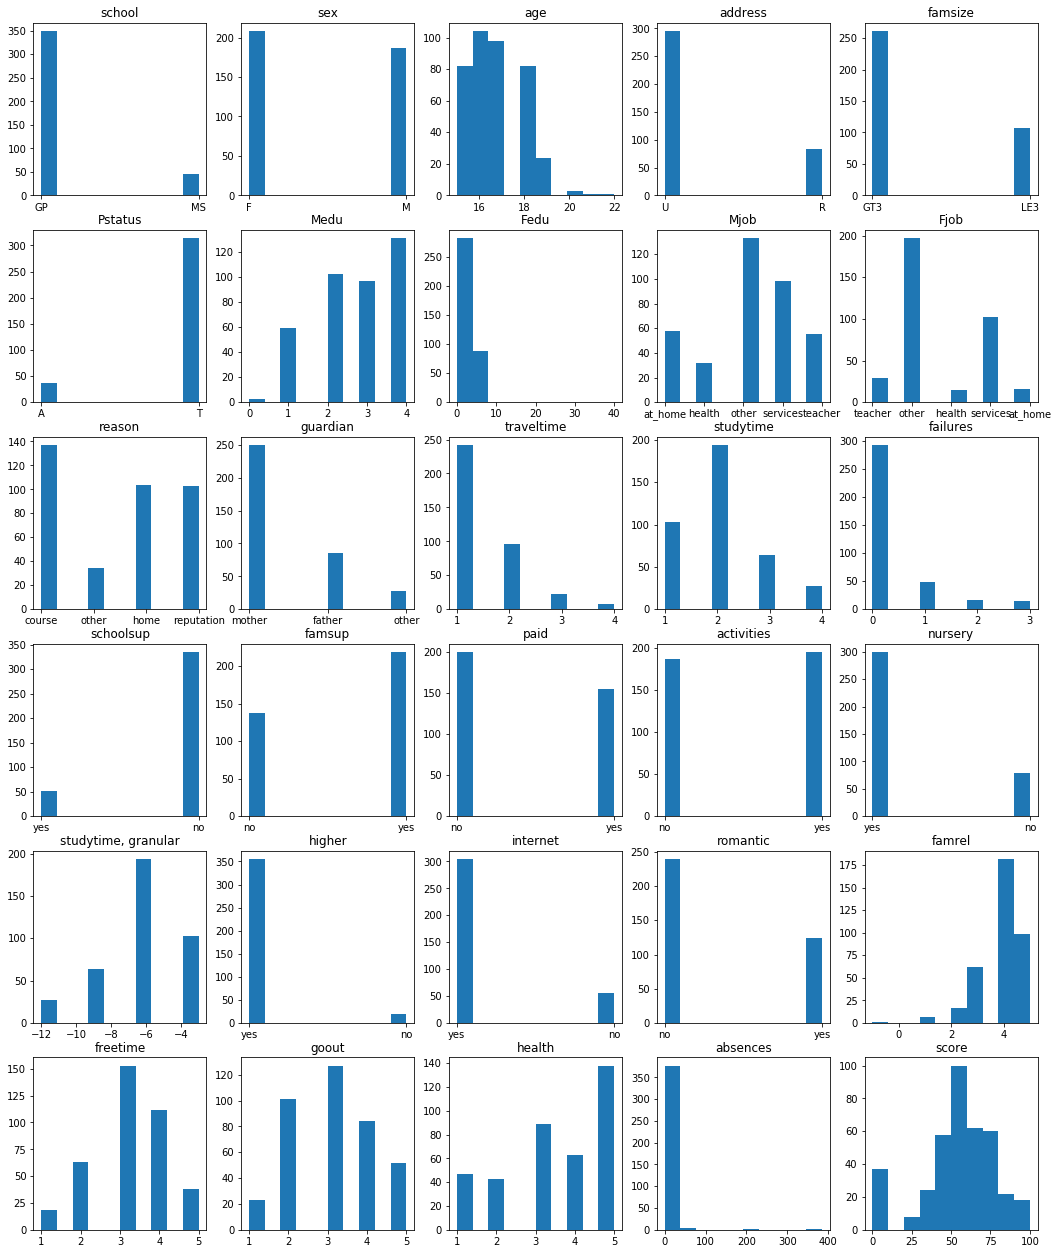

In [7]:
# Анализ колонок, содержащих номинативные признаки
# ver1.0

def raw_analysis(columns):
    """
    Primary analysis of columns: number of unique values, values that are found for over 10 times,
    value_counts(), number of non-null values, and bar chart for each one.
    """
    
    rows, cols = 6, 5
    size = rows * cols
    fig, axs = plt.subplots(rows, cols, figsize=(18, 20)) # plot template
    columns_resize = np.hstack((np.array(columns, dtype=str), # fitting in the column names array to the shape of the plot
                         np.full(size-len(columns), fill_value='', dtype=str))).reshape((rows, cols))
    nunique, over_10, notnull = [], [], []
    
    for index, col in np.ndenumerate(columns_resize):
        if col == '':
            axs[index[0], index[1]].get_xaxis().set_visible(False)
            axs[index[0], index[1]].get_yaxis().set_visible(False)
            continue
        else:
#             print('Колонка: {}'.format(col))
#             print('Уникальных значений: {}; значений, встретившихся более 10 раз: {}'.format(
#                 df[col].nunique(), (df[col].value_counts()>10).sum())
#                  )
            nunique.append(df[col].nunique())
            over_10.append((df[col].value_counts()>10).sum())
            notnull.append(df[col].count())
            
#             display(pd.DataFrame(df[col].value_counts()))
#             display(df.loc[:, [col]].info())
            
            axs[index[0], index[1]].hist(df[col][df[col].notna()]) # filling in the plot with subplots
            axs[index[0], index[1]].set_title(col)
        
    pivot = pd.DataFrame({'nunique': nunique, 'over_10': over_10, 'notnull': notnull}, index=columns)
    display(pivot)
        
        
# cols1 = list(df.columns[:2]) + list(df.columns[3:28])
raw_analysis1(df.columns)

Выводы из вышеизложенного:

1. Колонки содержат небольшое число пропусков.
2. Пропуски заполнены корректно, содержат np.nan/None values.
3. В целом колонки заполнены правильно, содержат только предполагаемые значения (видно из числа уникальных значений). Выбросы (ошибки заполнения) содержатся только в **Fedu** (>4), **famrel** (<0), скорее всего, **absences** (>100) и, возможно, **score** (ближе к 0). Эти колонки рассмотрим отдельно.

## 2. Корректировка выбросов/ошибочно внесенных значений

In [8]:
# Fedu может содержать только целые значения от 0 до 4, остальные заменяем None
df['Fedu'] = df['Fedu'].apply(lambda x: x if x in range(0, 5) else None)
df['Fedu'].value_counts()

2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: Fedu, dtype: int64

In [9]:
# famrel может содержать только целые значения от 1 до 5, остальные заменяем None
df['famrel'] = df['famrel'].apply(lambda x: x if x in range(1, 6) else None)
df['famrel'].value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

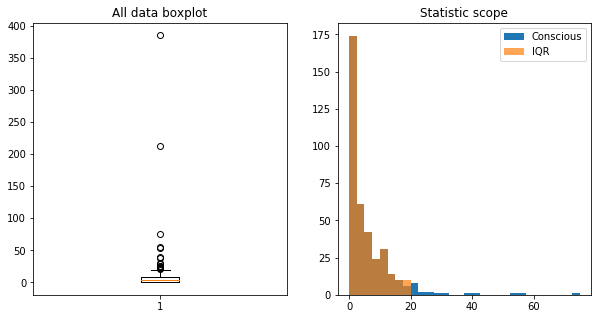

In [10]:
# absences нужно обрабатывать стат. методами

def stat_for_col(column): 
    median = df[column].median()
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    iqr = perc75 - perc25
    return median, perc25, perc75, iqr
    

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].boxplot(df['absences'][df['absences'].notna()]) # визуализируем выбросы
axs[0].set_title('All data boxplot')

median, perc25, perc75, iqr = stat_for_col('absences') # находим численные значения стат параметров

axs[1].hist(df['absences'][df['absences'] < 100], label='Conscious', bins=30) # отбрасываем только 2 выброса, которые >100
axs[1].hist(df['absences'][df['absences'].between(perc25-1.5*iqr, perc75+1.5*iqr)], label='IQR', bins=8, alpha=0.7)
axs[1].set_title('Statistic scope')
axs[1].legend()

In [11]:
# количество выбросов между максимумом стат. разброса данных и 100
display(pd.DataFrame(df['absences'][df['absences'].between(perc75+1.5*iqr, 100)].sort_values()))

,absences
311,20.0
118,20.0
304,20.0
237,20.0
260,21.0
313,22.0
277,22.0
216,22.0
320,23.0
198,24.0


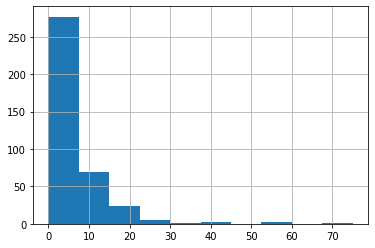

In [12]:
# в данном интервале содержится довольно много потенциально реальных значений, 
# поэтому отбрасываем только 2 явных выброса >100
df['absences'] = df['absences'].apply(lambda x: x if x <= 100 else None)

df['absences'].hist()

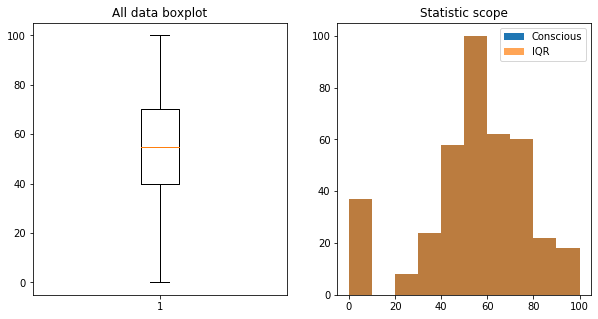

In [13]:
# score - целевая переменная, поэтому строки с пропусками ее значений можно полностью удалить, по ним нельзя будет
# предсказывать ее значение

df.dropna(axis=0, subset=['score'], inplace=True)

# проверим, есть ли в score выбросы, стат. методами

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].boxplot(df['score'][df['score'].notna()]) # визуализируем выбросы
axs[0].set_title('All data boxplot')

median, perc25, perc75, iqr = stat_for_col('score') # находим численные занчения стат параметров

axs[1].hist(df['score'][df['score'].notna()], label='Conscious', bins=10)
axs[1].hist(df['score'][df['score'].between(perc25-1.5*iqr, perc75+1.5*iqr)], label='IQR', bins=10, alpha=0.7)
axs[1].set_title('Statistic scope')
axs[1].legend()

In [14]:
# как видим, в колонке нет выбросов, корректировать ее не нужно. В любом случае, она является целевой переменной,
# коррекция по определению не нужна.

## 3. Корреляционный анализ

**1. Колонки, содержащие численные переменные**

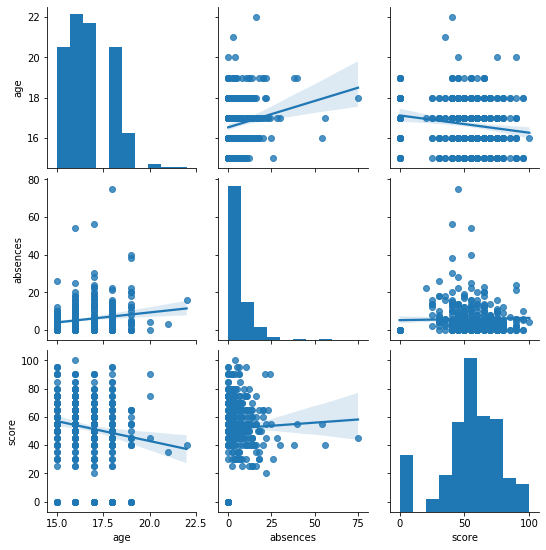

In [16]:
sns.pairplot(df.loc[:, df.columns.isin(quantitative)], kind='reg')

In [17]:
df.loc[:, df.columns.isin(quantitative)].corr()

,age,absences,score
age,1.000000,0.166773,-0.155726
absences,0.166773,1.000000,0.031698
score,-0.155726,0.031698,1.000000


**Выводы:**

1. Колонки слабо коррелируют между собой, все параметры могут оказывать влияние на успеваемость по математике.
2. Рассмотренные колонки необходимо оставить.
3. Из вида точечных графиков <i>score</i> видно, что это скорее категориальная переменная - переместим ее в ранг категориальных (ниже).

**2. Колонки, содержащие категориальные переменные**

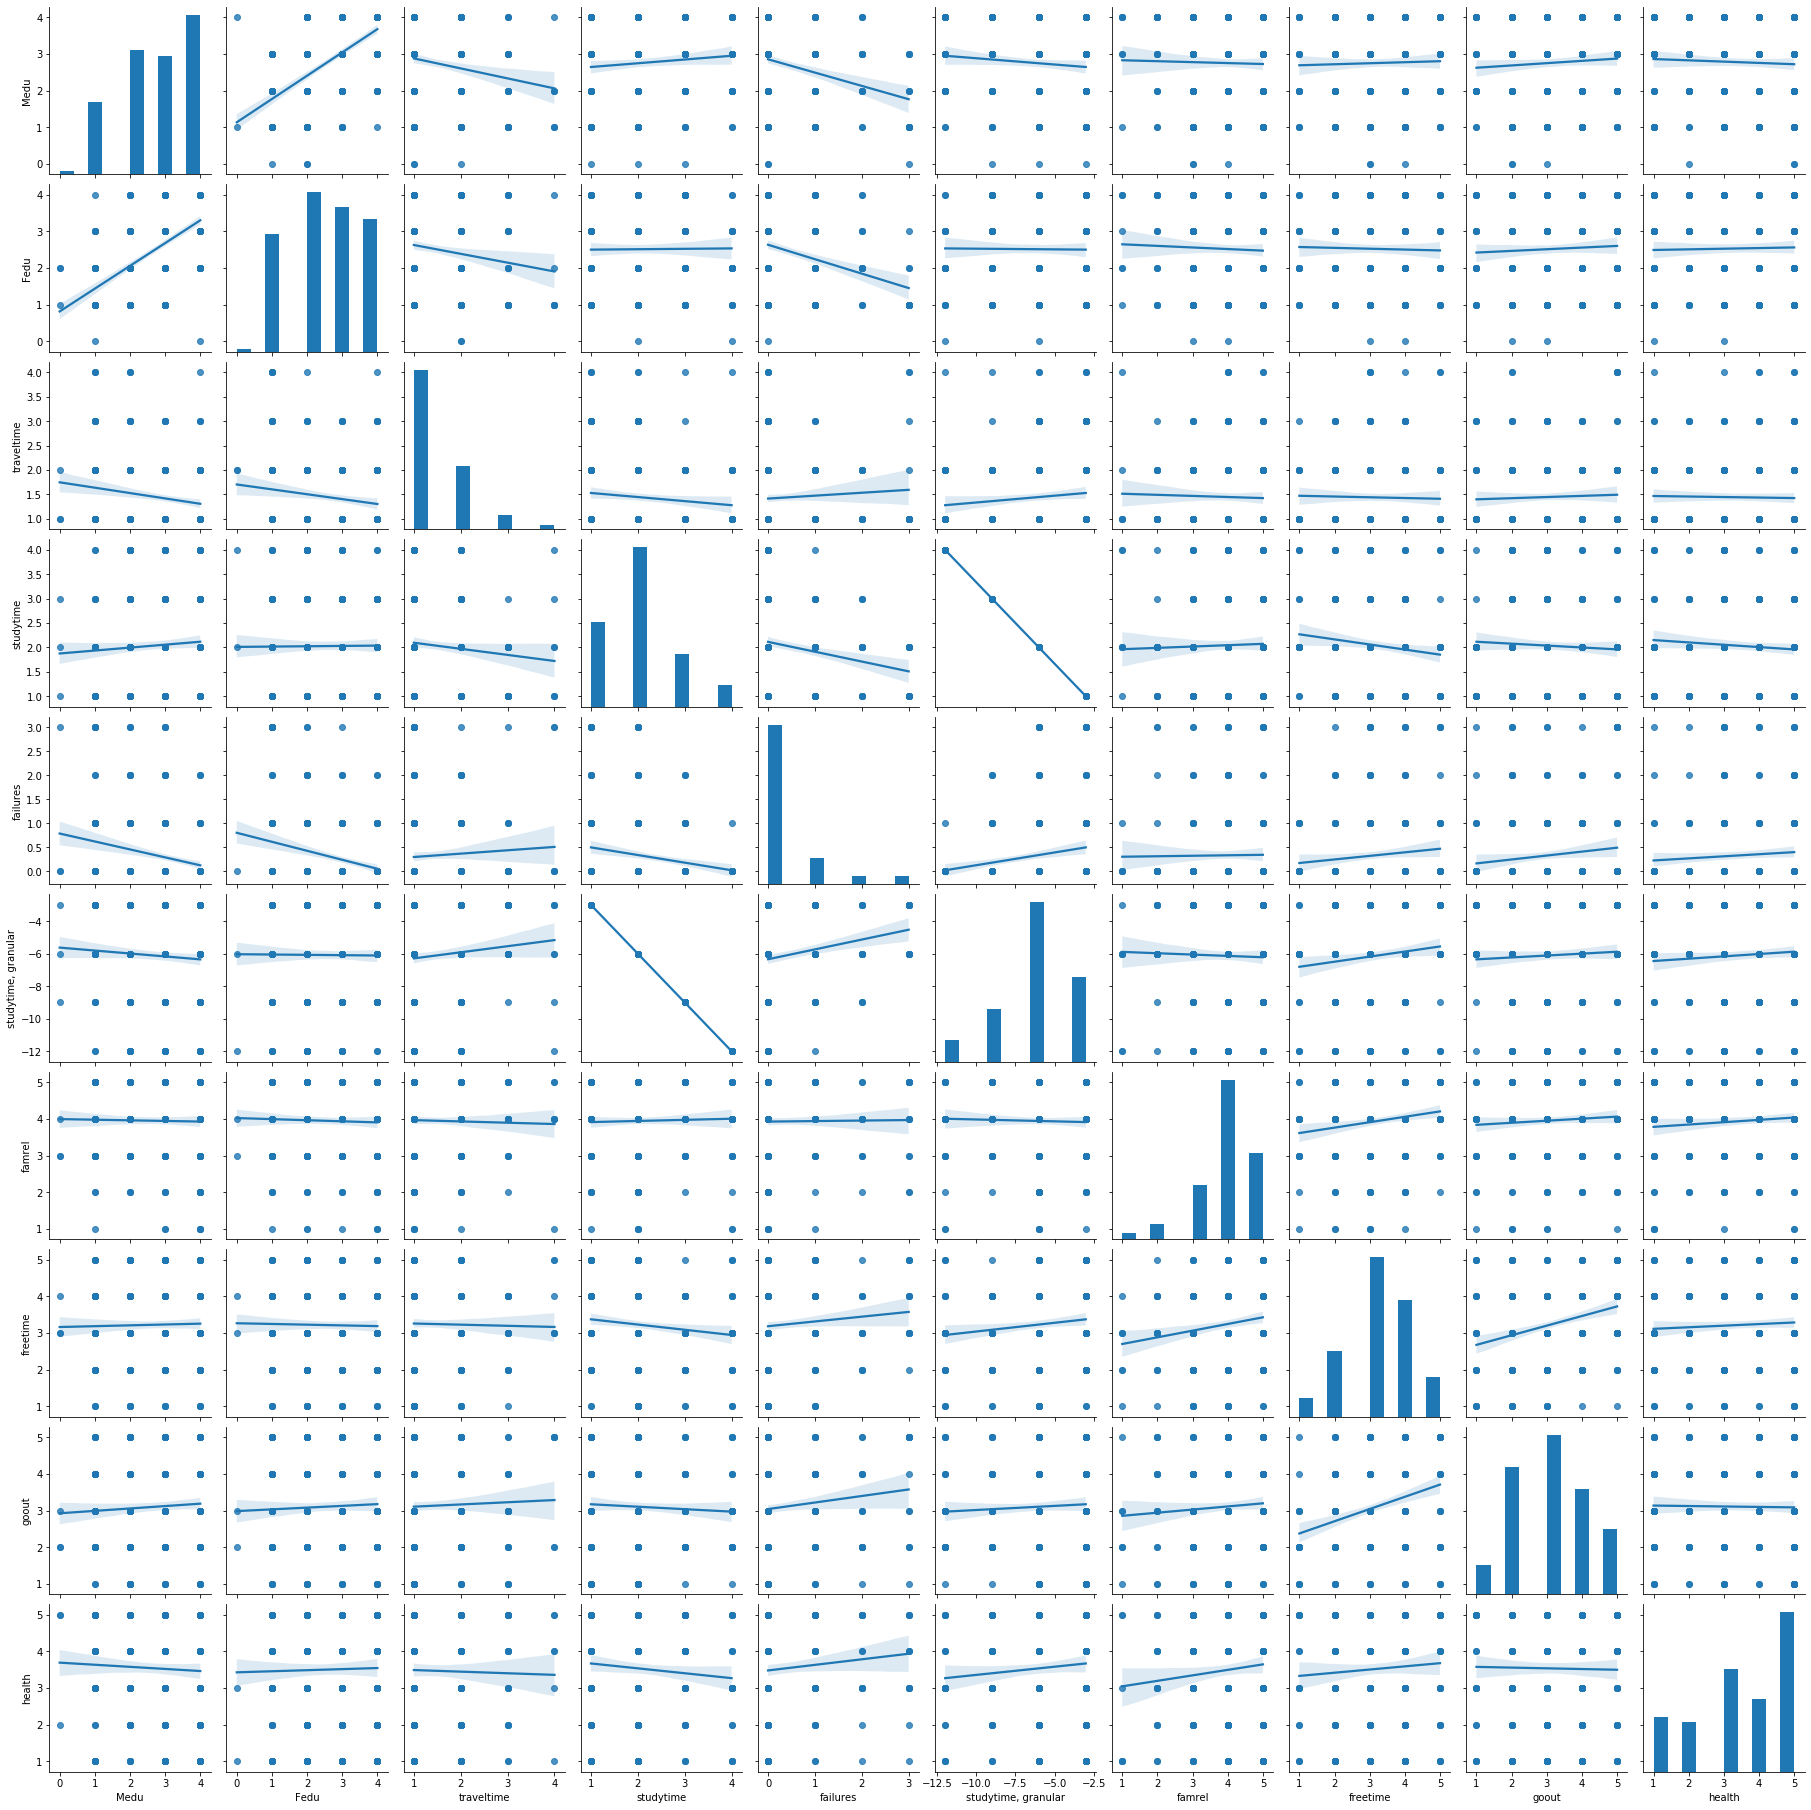

In [18]:
sns.pairplot(df.loc[:, df.columns.isin(categorical)], kind='reg')

In [19]:
corr1 = df.loc[:, df.columns.isin(categorical)].corr()
corr1

,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health
Medu,1.000000,0.629956,-0.173515,0.078589,-0.245463,-0.078589,-0.020896,0.025335,0.064164,-0.045051
Fedu,0.629956,1.000000,-0.155459,0.008603,-0.271936,-0.008603,-0.035788,-0.021415,0.046581,0.022588
traveltime,-0.173515,-0.155459,1.000000,-0.102206,0.064699,0.102206,-0.028220,-0.021937,0.037636,-0.021531
studytime,0.078589,0.008603,-0.102206,1.000000,-0.178992,-1.000000,0.028918,-0.121969,-0.051280,-0.080016
failures,-0.245463,-0.271936,0.064699,-0.178992,1.000000,0.178992,0.011942,0.098382,0.120914,0.081284
"studytime, granular",-0.078589,-0.008603,0.102206,-1.000000,0.178992,1.000000,-0.028918,0.121969,0.051280,0.080016
famrel,-0.020896,-0.035788,-0.028220,0.028918,0.011942,-0.028918,1.000000,0.164324,0.069241,0.097910
freetime,0.025335,-0.021415,-0.021937,-0.121969,0.098382,0.121969,0.164324,1.000000,0.296437,0.061575
goout,0.064164,0.046581,0.037636,-0.051280,0.120914,0.051280,0.069241,0.296437,1.000000,-0.015608
health,-0.045051,0.022588,-0.021531,-0.080016,0.081284,0.080016,0.097910,0.061575,-0.015608,1.000000


In [20]:
corr1[abs(corr1) > 0.5]

,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health
Medu,1.000000,0.629956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fedu,0.629956,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveltime,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studytime,NaN,NaN,NaN,1.0,NaN,-1.0,NaN,NaN,NaN,NaN
failures,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
"studytime, granular",NaN,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,NaN,NaN
famrel,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
freetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
goout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


**Выводы:**

1. В целом, проводить корреляционный анализ категориальных признаков было бессмысленно, однако мы увидели, что колонки <i>studytime</i> и <i>studytime, granular</i> полностью коррелируют, поэтому дублирующую <i>studytime, granular</i> удалим.
2. Колонки с относительно высокой корреляцией (коэф > 0.5) - <i>Medu</i> и <i>Fedu</i>, однако не настолько, чтобы удалить одну из колонок.

In [21]:
df.drop('studytime, granular', axis=1, inplace=True)

In [22]:
# номер этой колонки был 20, соответственно, нужно скорректировать переменные nominal, categorical, quantitative
# после удаления

# продублируем существующие переменные для наглядности:
# nominal_numbers = [0,1,3,5,8,9,10,11,15,16,17,18,19,21,22,23]
# categorical_numbers = [4,6,7,12,13,14,20,24,25,26,27]
# quantitative_numbers = [2,28,29]

categorical_numbers.append(quantitative_numbers.pop()) # перемещаем score из количественных признаков в ранговые

# меняем номера столбцов после исключения 20
for item in [nominal_numbers, categorical_numbers, quantitative_numbers]:
    for k, v in enumerate(item):
        item[k] = v if (v < 20) else (v - 1)

# переприсваимваем названия колонок
nominal = list(df.columns[nominal_numbers])
categorical = list(df.columns[categorical_numbers])
quantitative = list(df.columns[quantitative_numbers])

Переведем колонки, содержащие только <i>да</i>, <i>нет</i> в численный вид и проверим, есть ли среди них коррелирующие.

In [26]:
# проверка на корреляцию параметров "да/нет":
yesno = pd.DataFrame(df.iloc[:, 15:23])
yesno.applymap(lambda x: 1 if x == 'yes' else 0 if x == 'no' else None).corr()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
schoolsup,1.000000,0.098607,-0.030622,0.069506,0.049241,0.056949,-0.004859,-0.067455
famsup,0.098607,1.000000,0.312699,-0.007412,0.064869,0.124554,0.098795,0.015542
paid,-0.030622,0.312699,1.000000,0.019044,0.121350,0.197203,0.174581,0.049475
activities,0.069506,-0.007412,0.019044,1.000000,-0.006010,0.099606,0.060126,-0.032455
nursery,0.049241,0.064869,0.121350,-0.006010,1.000000,0.068030,0.032580,0.019314
higher,0.056949,0.124554,0.197203,0.099606,0.068030,1.000000,0.043522,-0.131382
internet,-0.004859,0.098795,0.174581,0.060126,0.032580,0.043522,1.000000,0.099781
romantic,-0.067455,0.015542,0.049475,-0.032455,0.019314,-0.131382,0.099781,1.000000


Видно, что корреляция признаков слабая, поэтому изменение колонок сохранять в исходный датафрейм не будем.

## 4. Заполнение пропусков

В некоторых колонках тип отсутсвия данных - MNAR (Missing Not At Random). Выявим связи между колонками и заполним соответственно.

Связи:
* famsize, Pstatus - если семья больше, чем 3 человека, вероятно, что родители живут вместе, и наоборот - меньше, чем 3 - раздельно. Однако неизвестна степень уверенности, с которой можно это утверждать, поэтому заполним только случаи, когда семья больше 3 человек;
* famsize, Medu, Fedu; Mjob, Fjob - если родители живут раздельно, могут быть неизвестны образование, работа одного из родителей, с кем ребенок не живет. Опять же неясна степень уверенности в данном пункте, эти пропуски заполнять не будем;
* home, traveltime - если время пути до школы небольшое, возможно, это послужило причиной выбора этой школы. Эти пропуски заполним рандомно 1 или 2 (время в дороге меньше 15/15-30 мин);
* schoolsup/famsup, address - проверим, зависит ли возможность получения дополнительной/семейной образовательной поддержки от местоположения школы (в городе/в сельской местности)
* Mjob/Fjob, higher - проверим, зависит ли желание детей получить высшее образование от занятости родителей.

In [28]:
indices = df[(df['Pstatus'].isna()) & (df['famsize'].notna())].index   # запоминаем индексы пустых значений
display(df.iloc[indices].sample(5))

# В колонке 'famsize' показан размер семьи: 'LE3' <= 3, 'GT3' > 3. Предположим, что если семья больше, чем 3 человека - 
# родители живут вместе, и заполним колонку 'Pstatus' соответственно
# ('T' - родители живут вместе, 'A' - раздельно):

df.loc[((df['Pstatus'].isna()) & (df['famsize'] == 'GT3')), 'Pstatus'] = 'T'
df.iloc[indices].sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
265,GP,M,18,R,LE3,None,3.0,4.0,None,other,...,yes,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0
198,GP,F,17,U,GT3,None,4.0,4.0,services,teacher,...,yes,yes,None,no,4.0,2.0,4.0,2.0,24.0,90.0
182,GP,F,17,U,GT3,None,2.0,4.0,services,None,...,yes,yes,no,no,5.0,4.0,2.0,5.0,0.0,85.0
149,GP,M,15,U,LE3,None,2.0,1.0,services,other,...,yes,None,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
197,GP,M,16,R,LE3,None,3.0,3.0,teacher,other,...,yes,yes,yes,no,3.0,3.0,4.0,3.0,8.0,50.0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
54,GP,F,15,U,LE3,None,3.0,3.0,None,other,...,yes,yes,yes,None,5.0,3.0,4.0,1.0,6.0,65.0
210,GP,F,19,U,GT3,T,3.0,3.0,other,other,...,yes,yes,yes,no,4.0,3.0,3.0,3.0,10.0,40.0
260,GP,F,18,U,GT3,T,4.0,3.0,None,other,...,yes,yes,yes,yes,3.0,1.0,2.0,2.0,21.0,90.0
265,GP,M,18,R,LE3,None,3.0,4.0,None,other,...,yes,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0
67,GP,F,16,U,GT3,T,3.0,NaN,services,other,...,yes,yes,yes,None,4.0,3.0,3.0,5.0,4.0,30.0


In [29]:
indices = df[(df['traveltime'].isna()) & (df['reason'] == 'home')].index   # запоминаем индексы пустых значений
display(df.loc[indices, ['reason', 'traveltime']].sample(5))

# Если в колонке 'reason' - 'home' (причина выбора школы - близость к дому), заполним 'traveltime' рандомно 1 или 2 
# (время в дороге меньше 15/15-30 мин):

df.loc[indices, 'traveltime'] = df.loc[indices, 'traveltime'].apply(lambda x: np.random.randint(1, 3))
display(df.loc[indices, ['reason', 'traveltime']].sample(5)) 

,reason,traveltime
234,home,NaN
372,home,NaN
30,home,NaN
26,home,NaN
310,home,NaN


,reason,traveltime
372,home,1.0
310,home,1.0
26,home,2.0
234,home,1.0
384,home,2.0


In [191]:
# schoolsup - address (в городе чаще поддержка?)

# m_index = [['schoolsup', 'schoolsup', 'famsup', 'famsup'],   # создание мультииндекса для сводной таблицы (from_tuples())
#           ['no', 'yes', 'no', 'yes']]
# m_index = list(zip(*m_index))
# print(m_index)
# index = pd.MultiIndex.from_tuples(m_index)

m_index = [np.array(['schoolsup', 'famsup']).repeat(3),
          np.array(['no', 'yes', '% yes'] * 2)]   # создание мультииндекса для сводной таблицы

schoolsup_pivot = df.pivot_table(index=['address'], columns='schoolsup', aggfunc='size', fill_value='0')
schoolsup_pivot['yes, %'] = round(schoolsup_pivot['yes']/(schoolsup_pivot['yes'] + schoolsup_pivot['no'])*100, 2)

famsup_pivot = df.pivot_table(index=['address'], columns='famsup', aggfunc='size', fill_value='0')
famsup_pivot['yes, %'] = round(famsup_pivot['yes']/(famsup_pivot['yes'] + famsup_pivot['no'])*100, 2)

sup_pivot = pd.concat((schoolsup_pivot, famsup_pivot), axis=1)
sup_pivot.columns=m_index
sup_pivot

schoolsup            famsup            
               no yes  % yes     no  yes  % yes
address                                        
R              73   9  10.98     32   46  58.97
U             247  40  13.94    100  163  61.98

Вывод: из сводной таблицы видно, что поддержка оказывается в равном соотношении как в городских школах, так и в сельских. Нет явных оснований заполнить пропуски в данных колонках какими-то определенными значениями.

In [199]:
Mjob_pivot = df.pivot_table(index='Mjob', columns='higher', aggfunc='size', fill_value='0')
# Mjob_pivot['yes, %'] = round(Mjob_pivot['yes']/(Mjob_pivot['yes'] + Mjob_pivot['no'])*100, 2)

Fjob_pivot = df.pivot_table(index='Fjob', columns='higher', aggfunc='size', fill_value='0')
# Fjob_pivot['yes, %'] = round(Fjob_pivot['yes']/(Fjob_pivot['yes'] + Fjob_pivot['no'])*100, 2)

m_index = [np.array(['Mjob / higher', 'Fjob / higher']).repeat(2),
          np.array(['no', 'yes'] * 2)]   # создание мультииндекса для сводной таблицы

job_pivot = pd.concat((Mjob_pivot, Fjob_pivot), axis=1)
job_pivot.columns = m_index
job_pivot

Mjob / higher        Fjob / higher       
                    no    yes            no    yes
at_home              7   49.0             1   15.0
health               0   32.0             0   15.0
other                6  121.0             7  177.0
services             4   87.0             9   87.0
teacher              1   49.0             1   28.0

Явной корреляции между работой родителей и желанием учеников получить высшее образование не видно, заполнять пропуски не будем.

In [187]:
# черновик функции к автоматизации кода 2х ячеек с кодом выше (постоение сводных таблиц)

def two_cols_pivot(col, ind):
    """
    
    """
    
    if type(col) == str and type(ind) == list:
    
    m_index = [np.array(cols).repeat(3),
              np.array(['no', 'yes', '% yes'] * 2)]   # создание мультииндекса для сводной таблицы
    
    pivot0 = df.pivot_table(index=ind, columns=cols[0], aggfunc='size', fill_value='0')
    display(pivot0)
    pivot0['yes, %'] = round(pivot0['yes']/(pivot0['yes'] + pivot0['no'])*100, 2)
    
    pivot1 = df.pivot_table(index=ind, columns=cols[1], aggfunc='size', fill_value='0')
    pivot1['yes, %'] = round(pivot1['yes']/(pivot1['yes'] + pivot1['no'])*100, 2)
    
    pivot = pd.concat((pivot0, pivot1), axis=1)
    pivot.columns=m_index
    
    return pivot

In [110]:
# проверка количества отсутствующих значений по строкам:
print('{} строки, в к-й отсутствуют <=4 значений'.format(395 - df.dropna(axis=0, thresh=(29-4)).shape[0]))
print('{} строк, в к-й отсутствуют <=3 значений'.format(395 - df.dropna(axis=0, thresh=(29-3)).shape[0]))
print('{} строк, в к-й отсутствуют <=2 значений'.format(395 - df.dropna(axis=0, thresh=(29-2)).shape[0]))
print('{} строк, в к-й отсутствуют <=1 значений'.format(395 - df.dropna(axis=0, thresh=(29-1)).shape[0]))

4 строки, в к-й отсутствуют <=4 значений
15 строк, в к-й отсутствуют <=3 значений
60 строк, в к-й отсутствуют <=2 значений
157 строк, в к-й отсутствуют <=1 значений


## 5. Анализ номинативных переменных

Номинативные переменные оцениваются с помощью построения боксплотов и нахождения статистически занчимых различий в распределении признаков в них.

In [200]:
def get_boxplots(columns):
    """
    Takes a list of column names, plots a set of bozplots of data distribution in each.
    """
    
    rows, cols = get_size(columns)
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(18, 3.7*rows)) # plot template
    fig.text(0.093, 0.5, 'math score', va='center', rotation='vertical') # set common y axis
    columns_new = resize_columns_list(rows, cols, columns)
    
    for index, col in np.ndenumerate(columns_new):
        if col == '':
            axs[index[0], index[1]].get_xaxis().set_visible(False) # hiding axes
            axs[index[0], index[1]].get_yaxis().set_visible(False)
            continue
        else:
            sns.boxplot(x=col, y='score', data=df, ax=axs[index[0], index[1]])
            plt.xticks(rotation=45)
            axs[index[0], index[1]].set_title('Boxplot for ' + col)
            axs[index[0], index[1]].set_xlabel('') # is there another method to hide axes labels?
            axs[index[0], index[1]].set_ylabel('')
#             axs[index[0], index[1]].tick_params(labelrotation=45) # rotate x ticks on 45 deg
    
    plt.show()

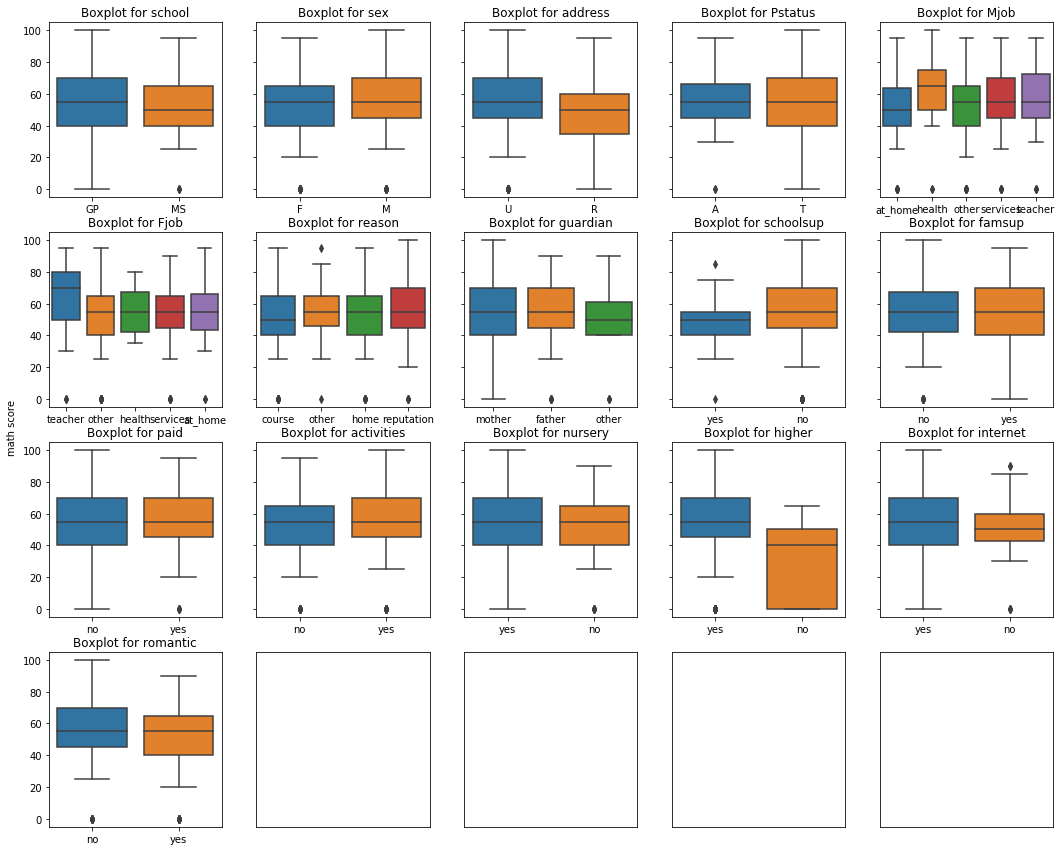

In [201]:
get_boxplots(nominal)

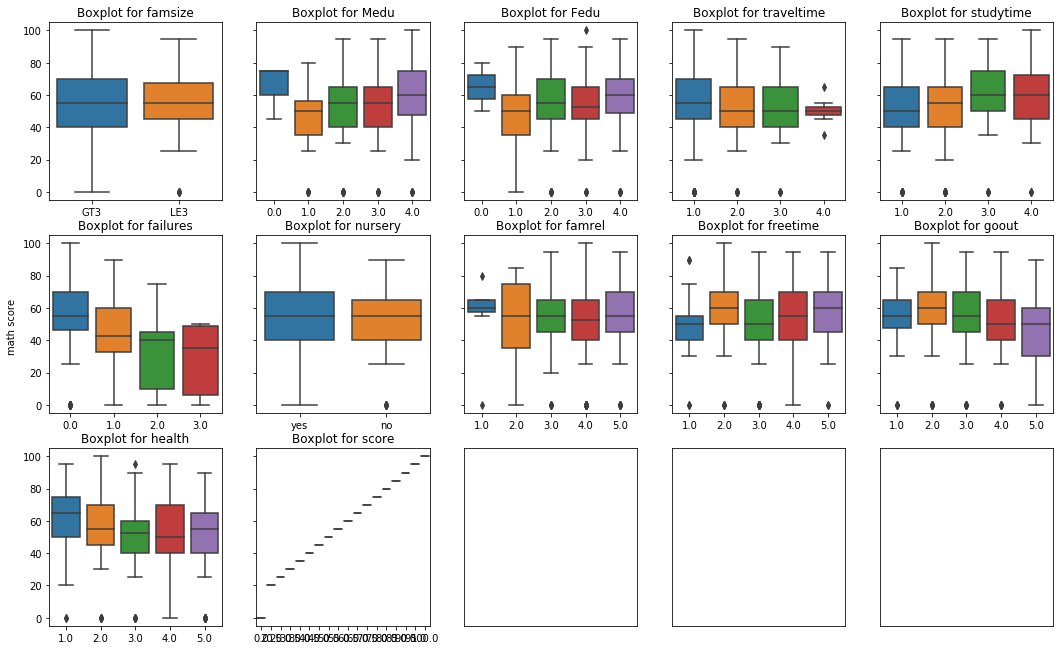

In [202]:
get_boxplots(categorical)

In [209]:
def get_stat_dif(column):
    combs = list(combinations(df[column].value_counts().index, 2))
    
    for comb in combs:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue <= 0.10/len(combs): # Учли поправку Бонферрони
            print('Найдены статистически значимые различия для колонки', column)
            return True

    return False

In [210]:
stat_important_columns = []
print('T-тест для колонок, содержащих номинативные признаки')

for column in nominal:
    if get_stat_dif(column) is True:
        stat_important_columns.append(column)

print('\nT-тест для колонок, содержащих категориальные признаки')

for column in categorical:
    if get_stat_dif(column) is True:
        stat_important_columns.append(column)

print('\nСтатистически значимые различия содержатся в колонках {}'.format(stat_important_columns))

T-тест для колонок, содержащих номинативные признаки
Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic

T-тест для колонок, содержащих категориальные признаки
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки score

Статистически значимые различия содержатся в колонках ['sex', 'address', 'Mjob', 'schoolsup', 'paid', 'higher', 'romantic', 'Medu', 'failures', 'goout', 'score']


Таким образом, колонки, которые следует оставить для построения модели:

In [215]:
cols_to_leave = quantitative + stat_important_columns
cols_to_leave

['age',
 'absences',
 'sex',
 'address',
 'Mjob',
 'schoolsup',
 'paid',
 'higher',
 'romantic',
 'Medu',
 'failures',
 'goout',
 'score']

## 6. Выводы

1. Колонки содержат небольшое число пропусков. Пропуски заполнены корректно, содержат np.nan/None values, а также едичинчное число ошибочно внесенных данных, замененных нами на None.
2. Численные признаки и ранговые признаки, содержащие только два уникальных значения (да/нет), слабо коррелируют между собой, для дальнейшего построения модели было решено оставить их все.
3. Частично заполнены пропуски в колонках Pstatus, traveltime.
4. Проверены гипотезы: зависит ли возможность получения дополнительной/семейной образовательной поддержки от местоположения школы (в городе/в сельской местности) и зависит ли желание детей получить высшее образование от занятости родителей. Зависимости не выявлены.
5. Большинство ранговых признаков не содержат статистически значимых различий в разрезе целевой переменной (score): 'school', 'age', 'famsize', 'Pstatus', 'Fedu', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'famsup', 'activities', 'nursery', 'studytime, granular', 'internet', 'famrel', 'freetime', 'health', 'absences' - они могут быть удалены из датасета для дальнейшего анализа.
6. Признаки, которые следует оставить для дизайна модели: 'age', 'absences', 'sex', 'address', 'Mjob', 'schoolsup', 'paid', 'higher', 'romantic', 'Medu', 'failures', 'goout', 'score'. Примечательно, что оценка по математике зависит от образования и работы матери, но не отца.